In [13]:
! pip install spectral

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 3.3 MB/s eta 0:00:00


In [1]:
! pip install gdal
! pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 76.0 MB/s eta 0:00:00


TIFFFILE

In [14]:
import tifffile as tif
import matplotlib.pyplot as plt
from spectral import imshow


In [3]:
img = tif.imread('/content/L71221071_07120010720_DN.tif')

In [4]:
img.shape

(1233, 1520, 6)

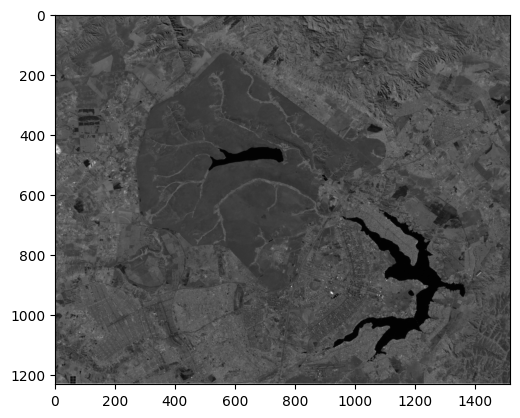

In [12]:
plt.imshow(img[:,:,3], cmap='Greys_r')

ImageView object:
  Display bands       :  (2, 3, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(4.0), np.float64(255.0)]
    G: [np.float64(12.0), np.float64(255.0)]
    B: [np.float64(40.0), np.float64(255.0)]

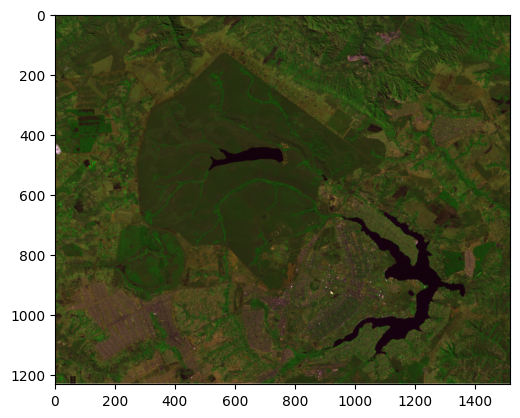

In [17]:
imshow(img, bands=(2,3,0))

**GDAL**


In [25]:
from osgeo import gdal
import numpy as np


In [19]:
img2 = gdal.Open('/content/L71221071_07120010720_DN.tif')

In [20]:
img3 = img2.ReadAsArray()

In [21]:
img3.shape

(6, 1233, 1520)

/usr/local/lib/python3.11/dist-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(12.0), np.float64(255.0)]
    G: [np.float64(12.0), np.float64(255.0)]
    B: [np.float64(12.0), np.float64(255.0)]

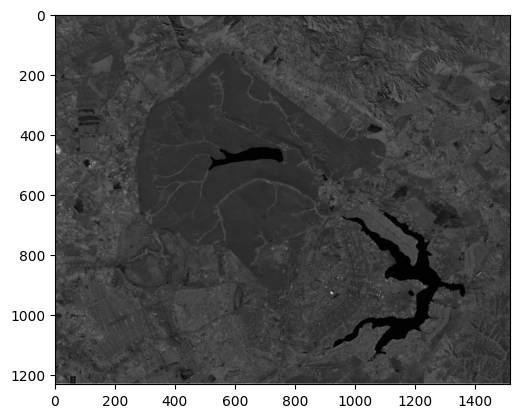

In [22]:
imshow(img3[3,:,:])

In [26]:
b1 = img2.GetRasterBand(1).ReadAsArray()
b2 = img2.GetRasterBand(2).ReadAsArray()
b4 = img2.GetRasterBand(4).ReadAsArray()

In [28]:
stack = np.dstack([b1,b2,b4])

In [29]:
stack.shape

(1233, 1520, 3)

/usr/local/lib/python3.11/dist-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(13.0), np.float64(255.0)]
    G: [np.float64(12.0), np.float64(255.0)]
    B: [np.float64(40.0), np.float64(255.0)]

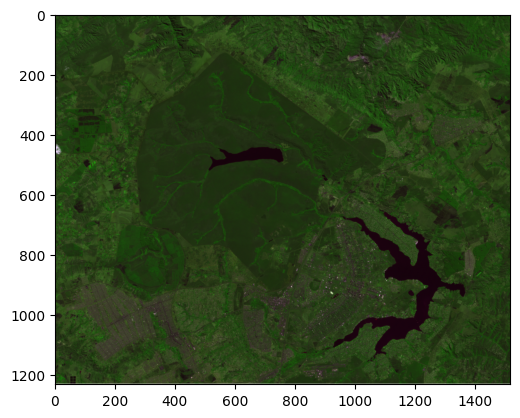

In [30]:
imshow(stack, (1,2,0))

**RASTERIO**

In [34]:
import rasterio
from rasterio.plot import show

In [33]:
rst = rasterio.open('/content/L71221071_07120010720_DN.tif')

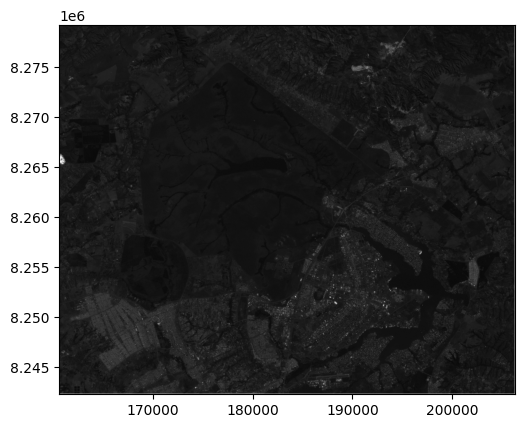

<Axes: >

In [35]:
show(rst, cmap='Greys_r')

In [36]:
b1 = rst.read(1)
b2 = rst.read(2)
b4 = rst.read(4)

In [37]:
stack = np.dstack([b1,b2,b4])

In [45]:
with rasterio.open('/content/L71221071_07120010720_DN.tif') as rst:
  b1 = rst.read(1)
  b2 = rst.read(2)
  b4 = rst.read(4)
  stack2 = np.dstack([b1,b2,b4])


/usr/local/lib/python3.11/dist-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(12.0), np.float64(255.0)]
    G: [np.float64(13.0), np.float64(255.0)]
    B: [np.float64(40.0), np.float64(255.0)]

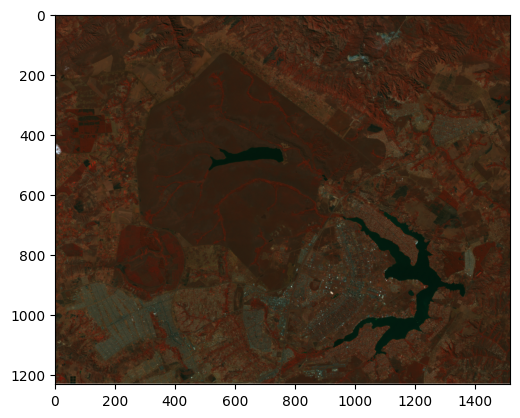

In [46]:
imshow(stack2, (2,1,0))

ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(12.0), np.float64(255.0)]
    G: [np.float64(13.0), np.float64(255.0)]
    B: [np.float64(40.0), np.float64(255.0)]

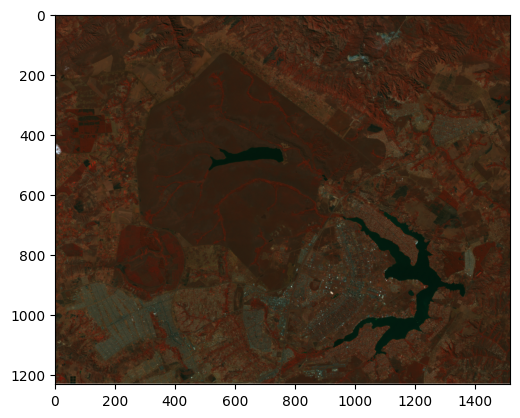

In [41]:
imshow(stack, (2,1,0))